In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns
import statsmodels.api as sm


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics


In [8]:
dataset = pd.read_csv('Dating.csv', encoding= 'unicode_escape')

In [9]:
dataset.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [14]:
dataset.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 195 columns):
iid         int64
id          float64
gender      int64
idg         int64
condtn      int64
wave        int64
round       int64
position    int64
positin1    float64
order       int64
partner     int64
pid         float64
match       int64
int_corr    float64
samerace    int64
age_o       float64
race_o      float64
pf_o_att    float64
pf_o_sin    float64
pf_o_int    float64
pf_o_fun    float64
pf_o_amb    float64
pf_o_sha    float64
dec_o       int64
attr_o      float64
sinc_o      float64
intel_o     float64
fun_o       float64
amb_o       float64
shar_o      float64
like_o      float64
prob_o      float64
met_o       float64
age         float64
field       object
field_cd    float64
undergra    object
mn_sat      object
tuition     object
race        float64
imprace     float64
imprelig    float64
from        object
zipcode     object
income      object
goal        float64
dat

In [18]:
dataset.isnull().sum() 

iid            0
id             1
gender         0
idg            0
condtn         0
            ... 
attr5_3     6362
sinc5_3     6362
intel5_3    6362
fun5_3      6362
amb5_3      6362
Length: 195, dtype: int64

In [23]:
null_columns=dataset.columns[dataset.isnull().sum() > 3000]
null_columns


Index(['undergra', 'mn_sat', 'tuition', 'income', 'expnum', 'attr5_1',
       'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1', 'attr1_s', 'sinc1_s',
       'intel1_s', 'fun1_s', 'amb1_s', 'shar1_s', 'attr3_s', 'sinc3_s',
       'intel3_s', 'fun3_s', 'amb3_s', 'attr7_2', 'sinc7_2', 'intel7_2',
       'fun7_2', 'amb7_2', 'shar7_2', 'attr5_2', 'sinc5_2', 'intel5_2',
       'fun5_2', 'amb5_2', 'you_call', 'them_cal', 'date_3', 'numdat_3',
       'num_in_3', 'attr1_3', 'sinc1_3', 'intel1_3', 'fun1_3', 'amb1_3',
       'shar1_3', 'attr7_3', 'sinc7_3', 'intel7_3', 'fun7_3', 'amb7_3',
       'shar7_3', 'attr4_3', 'sinc4_3', 'intel4_3', 'fun4_3', 'amb4_3',
       'shar4_3', 'attr2_3', 'sinc2_3', 'intel2_3', 'fun2_3', 'amb2_3',
       'shar2_3', 'attr3_3', 'sinc3_3', 'intel3_3', 'fun3_3', 'amb3_3',
       'attr5_3', 'sinc5_3', 'intel5_3', 'fun5_3', 'amb5_3'],
      dtype='object')

In [30]:
value = dataset[null_columns].isnull().sum()
dataset.drop(null_columns, axis =1, inplace = True)

In [31]:
dataset.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2
0,1,1.0,0,1,1,1,10,7,NaN,4,...,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0
1,1,1.0,0,1,1,1,10,7,NaN,3,...,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0
2,1,1.0,0,1,1,1,10,7,NaN,10,...,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0
3,1,1.0,0,1,1,1,10,7,NaN,5,...,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0
4,1,1.0,0,1,1,1,10,7,NaN,7,...,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0


In [35]:
dataset[dataset.columns[dataset.isnull().any()]].isnull().sum()

id             1
positin1    1846
pid           10
int_corr     158
age_o        104
            ... 
attr3_2      915
sinc3_2      915
intel3_2     915
fun3_2       915
amb3_2       915
Length: 111, dtype: int64

In [36]:
data2 = dataset.dropna()

In [42]:
data2.columns

Index(['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round', 'position',
       'positin1', 'order',
       ...
       'sinc2_2', 'intel2_2', 'fun2_2', 'amb2_2', 'shar2_2', 'attr3_2',
       'sinc3_2', 'intel3_2', 'fun3_2', 'amb3_2'],
      dtype='object', length=124)

In [41]:
pd.options.display.max_rows = 1000 
corr = data2.corr()
corr

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2
iid,1.000000,0.068048,0.138187,0.070721,0.166907,0.993714,0.142011,0.097847,0.060696,0.039859,...,-0.109293,-0.251377,0.010700,-0.277650,-0.243281,-0.134137,-0.057352,-0.130427,0.051461,-0.034378
id,0.068048,1.000000,0.062277,0.998730,0.269966,0.025790,0.412681,0.144568,0.159488,0.167006,...,0.055803,0.022668,-0.023282,-0.032928,-0.023493,-0.058326,0.082684,0.059913,0.072034,0.115647
gender,0.138187,0.062277,1.000000,0.102470,0.006709,0.066441,0.016076,0.035170,-0.010092,-0.003875,...,0.282231,0.242986,-0.134272,0.324069,-0.236227,-0.040434,-0.201006,0.073285,-0.126318,-0.073365
idg,0.070721,0.998730,0.102470,1.000000,0.274753,0.025913,0.422413,0.150050,0.161029,0.170377,...,0.064689,0.031606,-0.027505,-0.017917,-0.032075,-0.058432,0.073314,0.063373,0.068051,0.113493
condtn,0.166907,0.269966,0.006709,0.274753,1.000000,0.154974,0.736243,0.310226,0.298233,0.279927,...,-0.023428,-0.046601,-0.006510,-0.090121,0.014417,0.014967,-0.032997,0.007024,0.074062,0.076415
wave,0.993714,0.025790,0.066441,0.025913,0.154974,1.000000,0.145956,0.098079,0.063261,0.042458,...,-0.124914,-0.264647,0.022941,-0.299631,-0.220164,-0.129400,-0.051216,-0.134050,0.050687,-0.036924
round,0.142011,0.412681,0.016076,0.422413,0.736243,0.145956,1.000000,0.388145,0.355878,0.385484,...,-0.042682,-0.097580,-0.027076,-0.134366,0.043324,0.048536,-0.032958,0.068205,0.029051,0.099813
position,0.097847,0.144568,0.035170,0.150050,0.310226,0.098079,0.388145,1.000000,0.763517,0.147529,...,-0.076789,-0.089154,-0.065901,-0.049913,-0.074612,-0.038784,-0.087905,0.034877,-0.028703,0.077458
positin1,0.060696,0.159488,-0.010092,0.161029,0.298233,0.063261,0.355878,0.763517,1.000000,0.121387,...,-0.039315,-0.086423,-0.016691,-0.013553,-0.010742,-0.026726,-0.131510,-0.008018,-0.103368,-0.045010
order,0.039859,0.167006,-0.003875,0.170377,0.279927,0.042458,0.385484,0.147529,0.121387,1.000000,...,-0.008973,-0.044541,-0.006193,-0.047170,0.036052,0.030770,-0.010883,0.018099,0.017472,0.035776


In [43]:
dataset.select_dtypes(include=['object'])

,field,from,zipcode,career
0,Law,Chicago,"60,521",lawyer
1,Law,Chicago,"60,521",lawyer
2,Law,Chicago,"60,521",lawyer
3,Law,Chicago,"60,521",lawyer
4,Law,Chicago,"60,521",lawyer
...,...,...,...,...
8373,Climate Dynamics,France,"78,110",assistant master of the universe (otherwise it...
8374,Climate Dynamics,France,"78,110",assistant master of the universe (otherwise it...
8375,Climate Dynamics,France,"78,110",assistant master of the universe (otherwise it...
8376,Climate Dynamics,France,"78,110",assistant master of the universe (otherwise it...


In [46]:
#dropping highly correlated features
# Create correlation matrix
corr_matrix = data2.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

In [47]:
to_drop

['idg', 'wave', 'pid']

In [51]:
dataset['match'].count()

8378

In [75]:
dating_1 = dataset.iloc[:, 11:28]
dating_2 = dataset.iloc[:, 30:35]
dating_3 = dataset.iloc[:, 39:43]
dating_4 = dataset.iloc[:, 45:67]
dating_5 = dataset.iloc[:, 69:74]
dating_6 = dataset.iloc[:, 87:91]
dating_7 = dataset.iloc[:, 97:102]
dating_8 = dataset.iloc[:, 104:107]
#combining everything to make one big column
date = pd.concat([dataset.iloc[:, 0],dataset.iloc[:, 2],dating_1,dataset['like'],dating_2,dating_3,dating_4,dating_5,
                  dating_6,dating_7,dating_8], axis=1)

In [77]:
date['like']

0       7.0
1       7.0
2       7.0
3       7.0
4       6.0
       ... 
8373    2.0
8374    4.0
8375    6.0
8376    5.0
8377    4.0
Name: like, Length: 8378, dtype: float64

In [78]:
date.dropna(inplace = True)

In [79]:
corr_matrix = date.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

In [80]:
to_drop

['pid']

In [81]:
date.isnull().sum()

iid         0
gender      0
pid         0
match       0
int_corr    0
samerace    0
age_o       0
race_o      0
pf_o_att    0
pf_o_sin    0
pf_o_int    0
pf_o_fun    0
pf_o_amb    0
pf_o_sha    0
dec_o       0
attr_o      0
sinc_o      0
intel_o     0
fun_o       0
like        0
like_o      0
prob_o      0
met_o       0
age         0
field       0
from        0
zipcode     0
goal        0
date        0
career_c    0
sports      0
tvsports    0
exercise    0
dining      0
museums     0
art         0
hiking      0
gaming      0
clubbing    0
reading     0
tv          0
theater     0
movies      0
concerts    0
music       0
shopping    0
yoga        0
exphappy    0
attr1_1     0
sinc1_1     0
intel1_1    0
shar1_1     0
attr4_1     0
sinc4_1     0
intel4_1    0
fun4_1      0
dec         0
attr        0
sinc        0
intel       0
match_es    0
satis_2     0
length      0
numdat_2    0
attr1_2     0
fun1_2      0
amb1_2      0
shar1_2     0
dtype: int64

In [82]:
data = date.drop(['sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 
                    'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 
                   'shopping', 'yoga'], axis=1)

Text(0, 0.5, 'Frequency')

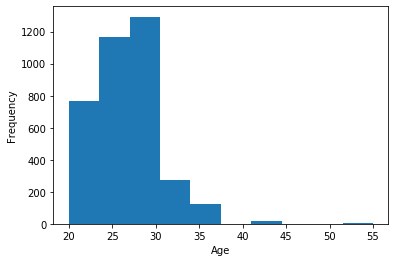

In [89]:
age = data[np.isfinite(data['age'])]['age']
plt.hist(age.values)
plt.xlabel('Age')
plt.ylabel('Frequency')

C:\Users\LastWorld\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\LastWorld\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


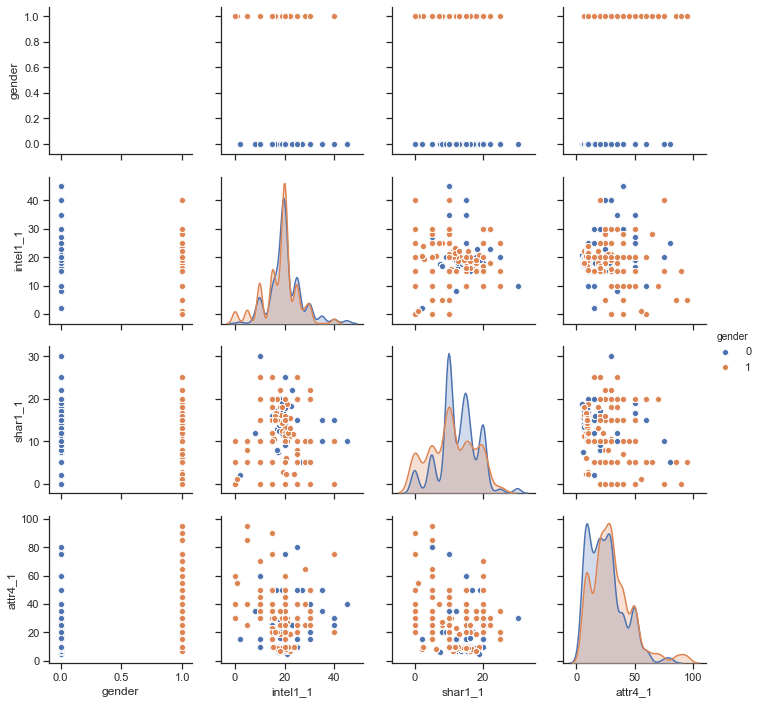

In [90]:
sns.set(style='ticks', color_codes=True)
date_int = pd.concat([data.iloc[:,1], data.iloc[:, 33:36]], axis = 1)
g = sns.pairplot(date_int, hue='gender')

In [73]:
dataset['like'].isnull().sum()

240

In [83]:
data.head()

,iid,gender,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,...,sinc,intel,match_es,satis_2,length,numdat_2,attr1_2,fun1_2,amb1_2,shar1_2
1846,132,0,137.0,0,0.16,0,26.0,4.0,17.39,17.39,...,9.0,7.0,0.0,7.0,1.0,1.0,15.79,17.54,17.54,15.79
1847,132,0,138.0,0,0.34,1,32.0,2.0,20.00,20.00,...,8.0,8.0,0.0,7.0,1.0,1.0,15.79,17.54,17.54,15.79
1849,132,0,140.0,1,0.13,1,29.0,2.0,18.60,16.28,...,9.0,9.0,0.0,7.0,1.0,1.0,15.79,17.54,17.54,15.79
1850,132,0,141.0,0,0.05,0,28.0,3.0,20.83,20.83,...,8.0,8.0,0.0,7.0,1.0,1.0,15.79,17.54,17.54,15.79
1856,134,0,137.0,1,-0.10,0,26.0,4.0,17.39,17.39,...,9.0,7.0,1.0,6.0,1.0,1.0,10.00,18.00,18.00,18.00


In [91]:
X=data[['like','dec','age',]]
y=data['match']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100, stratify=y)

In [92]:
model = RandomForestClassifier(n_estimators = 500)
rf_model = model.fit(X_train, y_train)
predict_train_rf = rf_model.predict(X_train)
predict_test_rf = rf_model.predict(X_test)
print('Training Accuracy:', metrics.accuracy_score(y_train, predict_train_rf))
print('Validation Accuracy:', metrics.accuracy_score(y_test, predict_test_rf))

Training Accuracy: 0.8466325036603221
Validation Accuracy: 0.8155872667398463
